In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

# Bayesian treatment of single-paramter models

## 3 Gaussian distribution with unknown mean and known standard deviation

In week 02, we have looked at samples from a Gaussian distribution. Let's get back to this example but make it a little more concrete. 

Imagine you moved into a new apartment. Your landlord told you that the longest side of your living room is 8 m long, but you do not quite trust him. So you decide to measure for yourself. The problem is, you only have a small measuring tape, so your measurements are not quite accurate, so you assume that your measurements are noisy with a standard deviation of $\sigma = 0.2$. To be extra sure, you measure the length of the room $N = 5$ times and get a distribution of measurements, which are plotted as ticks on the x-axis in the following cell. The curve is the likelihood function, expressing for different values $\mu$ on the x-axis, how likely the observed data are, assuming they were generated from this $\mu$:

$$ L(D; \mu) =\prod_n p(x_n | \mu, \sigma)=\prod_n \mathcal{N}(x_n | \mu, \sigma) $$

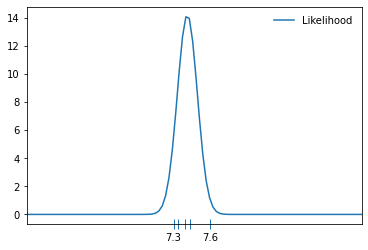

In [6]:
from scipy.stats import norm

mean = 7.5 # true mean (not known to us)

sigma = 0.2 # noise in our measurement
N = 5 # number of measurements
x = np.random.randn(N) * sigma + mean

# for plotting
xrange = np.linspace(6, 9, 100)

def gaussian_likelihood(x, mu, sigma):
    ll = np.sum(np.array([norm.logpdf(xi, loc=mu, scale=sigma) for xi in x]), axis=0)
    return np.exp(ll)

# plot the likelihood
plt.plot(xrange, gaussian_likelihood(x, xrange, sigma), label="Likelihood", color="C0")

# plot the data as ticks on the x axis
plt.xticks(np.sort(x), labels = np.array([round(min(x), 1)]+[None for _ in range(len(x)-2)]+[round(max(x), 1)]))
plt.tick_params(axis="x", direction="inout", width=1, length=10, color="C0")

plt.xlim(6, 9)
plt.legend(frameon=False)
plt.show()

If all we have is the sample, the MLE is the best we can do. But we can also use our prior knowledge. We know that the landlord told us our room is 8 m long, so we express this as a prior distribution. For mathematical convenience, we express this as a Gaussian with $\mu_0 = 8$. We use a standard deviation $\sigma_0 = 1$, expressing that we are rather unsure about our landlord's statement.

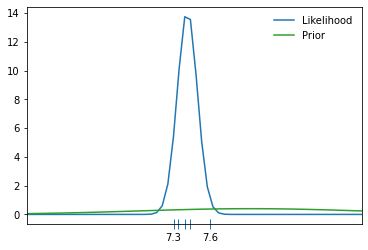

In [7]:
mu_0 = 8
sigma_0 = 1.

xrange = np.linspace(6, 11, 100)

# plot the likelihood
plt.plot(xrange, gaussian_likelihood(x, xrange, sigma), label="Likelihood", color="C0")

# plot the data as ticks on the x axis
plt.xticks(np.sort(x), labels=np.array([round(min(x), 1)]+[None for _ in range(len(x)-2)]+[round(max(x), 1)]))
plt.tick_params(axis="x", direction="inout", width=1, length=10, color="C0")

# plot the prior
plt.plot(xrange, norm.pdf(xrange, loc=mu_0, scale=sigma_0), label="Prior", color="C2")
plt.legend(frameon=False)
plt.xlim(6, 9)
plt.show()

What should we think the size of our room is, given our prior knowledge and the data we observed? The answer is given by Bayes' rule:

$$ p(\mu | D, \sigma) \propto p(D | \mu, \sigma) p(\mu_0 | \sigma_0) $$

We can safely assume that our prior knowledge about the mean is independent from the noise in our measurements, so

$$ p(\mu | D, \sigma) \propto p(D | \mu, \sigma) p(\mu_0) $$

Since the product of two Gaussians is again Gaussian, we arrive at 

$$ p(\mu | D, \sigma) = \mathcal{N}(\mu | \mu_\text{post}, \sigma_\text{post}) $$

with $\sigma_\text{post}^2 = (\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2})^{-1}$ and $\mu_\text{post} = \sigma_\text{post}^2 (\frac{\mu_0}{\sigma_0^2} + \frac{\sum_n x_n}{\sigma^2}) $. You will show this in your practical assignment.

__Note that you can see another conjugate distribution pair here!__

In [8]:
# Play around with standard deviation of likelihood and prior!
@interact(sigma=(0.1, 1.0), sigma_0=(0.1, 1.0), mu_0=(8, 10))
def update(sigma, sigma_0, mu_0):
    # plot the likelihood
    plt.plot(xrange, gaussian_likelihood(x, xrange, sigma), label="Likelihood", color="C0")

    # plot the data as ticks on the x axis
    plt.xticks(np.sort(x), labels=np.array([round(min(x), 1)]+[None for _ in range(len(x)-2)]+[round(max(x), 1)]))
    plt.tick_params(axis="x", direction="inout", width=1, length=10, color="C0")

    # plot the prior
    plt.plot(xrange, norm.pdf(xrange, loc=mu_0, scale=sigma_0), label="Prior", color="C2")

    # compute and plot the posterior mean
    ... # your code here

    plt.legend(frameon=False)
    plt.xlim(6, 10)
    plt.show()

interactive(children=(FloatSlider(value=0.55, description='sigma', max=1.0, min=0.1), FloatSlider(value=0.55, …